<a href="https://colab.research.google.com/github/aneshhh/CPC_A-M/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load training and testing data
train_data = pd.read_csv("/content/assignment_files-2.csv")  # Replace with your file path
test_data = pd.read_csv('/content/assignment_files-1.csv')    # Replace with your file path

# Quick overview
print("Training Data Overview:")
print(train_data.head())
print("\nTesting Data Overview:")
print(test_data.head())

In [ ]:
df = pd.read_csv("/content/assignment_files-2.csv")
df1 = df.drop_duplicates()
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
print("Missing values in training dataset:")
print(df1.isnull().sum())

Missing values in training dataset:
Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
nullvalue_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                     'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                     'Loan_Amount_Term', 'Credit_History', 'property_Area']

for columns in nullvalue_columns:
    print(f"{df1[columns].value_counts()}\n")

Gender
Male      487
Female    112
Name: count, dtype: int64

Married
Yes    398
No     213
Name: count, dtype: int64

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Education
Graduate        479
Not Graduate    134
Name: count, dtype: int64

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

ApplicantIncome
2500.0    9
2600.0    6
6000.0    6
4583.0    5
3750.0    5
         ..
3975.0    1
3244.0    1
4408.0    1
3917.0    1
7583.0    1
Name: count, Length: 504, dtype: int64

CoapplicantIncome
0.0       273
2500.0      5
1666.0      5
2083.0      5
1459.0      3
         ... 
1010.0      1
1695.0      1
2598.0      1
1779.0      1
240.0       1
Name: count, Length: 286, dtype: int64

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      

In [ ]:
columns_to_fill = ['Gender', 'Married', 'Self_Employed', 'Education', 'Credit_History', 'property_Area', 'CoapplicantIncome',
                   'Dependents', 'Loan_Amount_Term']

df2 = df1.copy()

for col in columns_to_fill:
    mode_value = df1[col].mode()[0]
    df2[col] = df2[col].fillna(mode_value)

In [ ]:
print("Missing values in new dataset:")
print(df2.isnull().sum())

Missing values in new dataset:
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       2
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
columns_to_fill = ['ApplicantIncome', 'LoanAmount']

df3 = df2.copy()

for col in columns_to_fill:
    mean_value = df2[col].mean()
    df3[col] = df3[col].fillna(mean_value)

In [ ]:
print("Missing values in new dataset:")
print(df3.isnull().sum())

Missing values in new dataset:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64


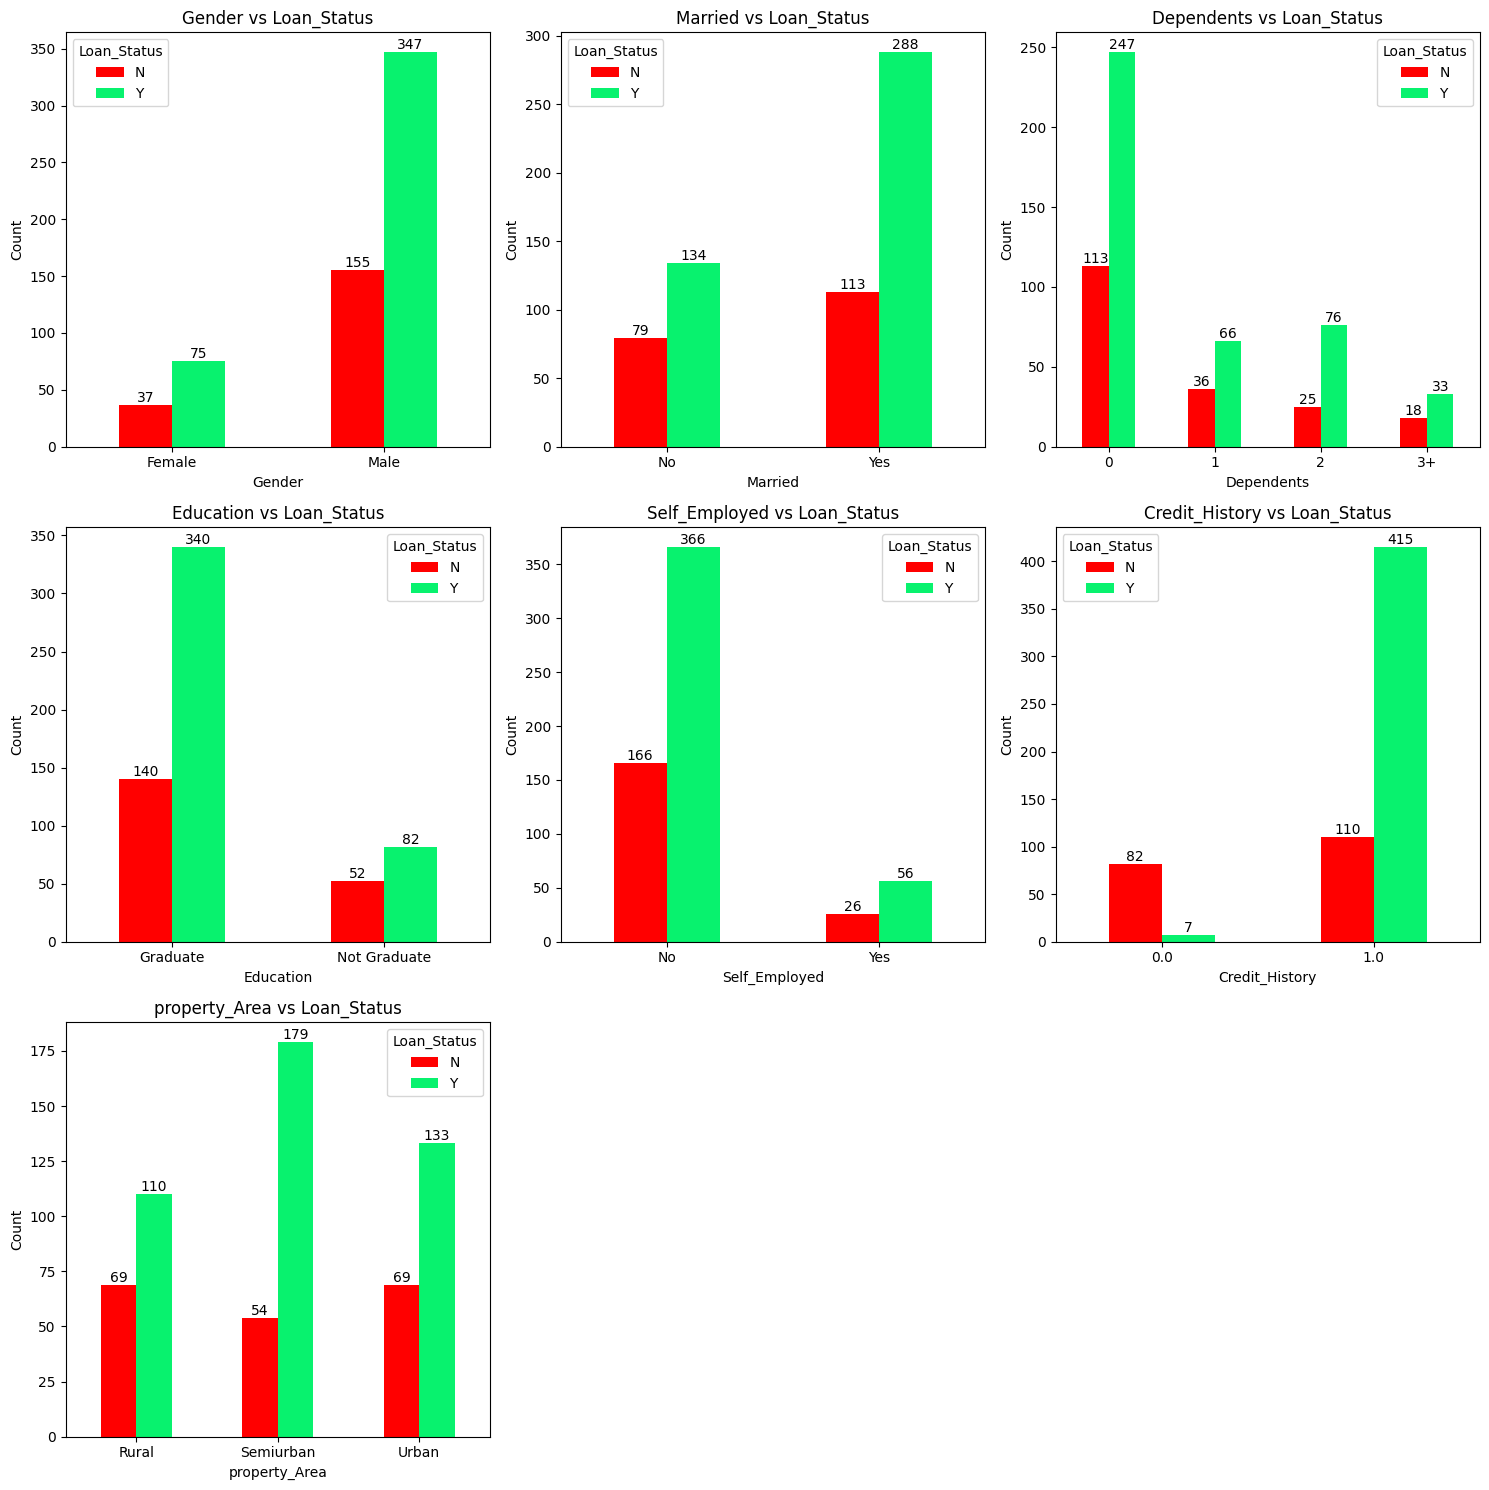

In [ ]:
columns = ['Gender', 'Married', 'Dependents', 'Education',
           'Self_Employed', 'Credit_History', 'property_Area']

plt.figure(figsize=(15, 15))

for i, col in enumerate(columns):
    plt.subplot(3, 3, i + 1)

    ax = df3.groupby([col, 'Loan_Status']).size().unstack().plot(
        kind='bar',
        stacked=False,
        ax=plt.gca(),
        color=['#ff0000', '#08f26e'] # Red for NO, Green for YES
    )

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

    plt.title(f'{col} vs Loan_Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

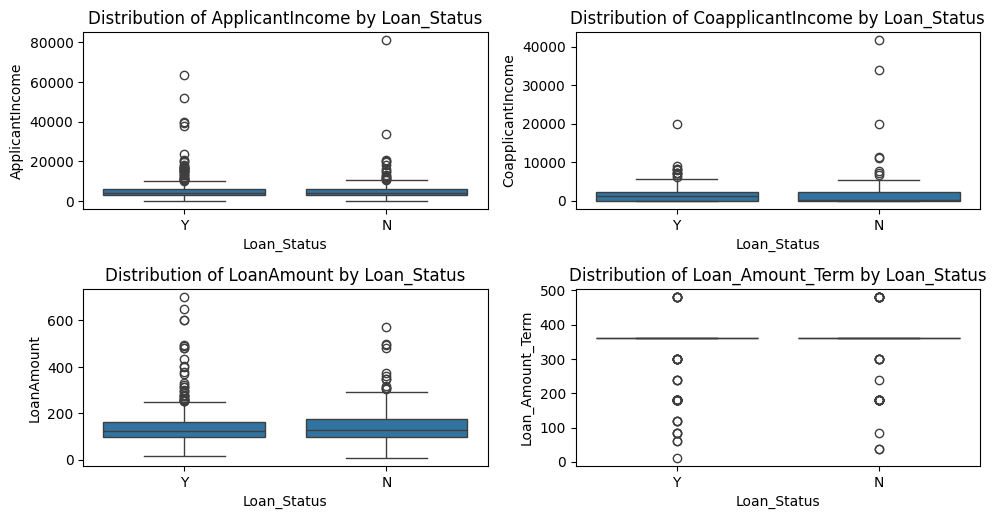

In [ ]:
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

plt.figure(figsize=(10, 10))

# Box Plots
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=df, x='Loan_Status', y=col)
    plt.title(f'Distribution of {col} by Loan_Status')
    plt.xlabel('Loan_Status')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
print(train_data.columns.tolist())


['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status']


In [ ]:
# Fill missing values for categorical columns with mode
categorical_columns = ["Gender", "Married", "Dependents", "Self_Employed", "Education", "property_Area"]
for col in categorical_columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# Fill missing values for numerical columns with median
numerical_columns = ["LoanAmount", "Loan_Amount_Term", "Credit_History", "ApplicantIncome", "CoapplicantIncome"]
for col in numerical_columns:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    test_data[col].fillna(train_data[col].median(), inplace=True)

<ipython-input-41-7a07439cc30b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)
<ipython-input-41-7a07439cc30b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store encoders for each column
label_encoders = {}

# List of categorical columns
categorical_columns = ["Gender", "Married", "Dependents", "Self_Employed", "Education", "property_Area"]

# Fit and transform training data, and only transform test data
for col in categorical_columns:
    if col in train_data.columns:
        le = LabelEncoder()  # Create a new encoder for each column
        train_data[col] = le.fit_transform(train_data[col].astype(str))  # Fit and transform train data
        if col in test_data.columns:
            test_data[col] = le.transform(test_data[col].astype(str))  # Transform test data using the same encoder
        label_encoders[col] = le  # Store the encoder for future use

# Verify that the encoding is applied
print("Training Data (After Encoding):")
print(train_data[categorical_columns].head())

print("\nTest Data (After Encoding):")
print(test_data[categorical_columns].head())


Training Data (After Encoding):
   Gender  Married  Dependents  Self_Employed  Education  property_Area
0       1        0           0              0          0              2
1       1        1           1              0          0              0
2       1        1           0              1          0              2
3       1        1           0              0          1              2
4       1        0           0              0          0              2

Test Data (After Encoding):
   Gender  Married  Dependents  Self_Employed  Education  property_Area
0       1        1           0              0          0              2
1       1        1           1              0          0              2
2       1        1           2              0          0              2
3       1        1           2              0          0              2
4       1        0           0              0          1              2


In [ ]:
# Label encoding for categorical columns
label_encoders = {}
for col in categorical_columns + ["Loan_Status"]:
    le = LabelEncoder()
    if col in train_data.columns:
        train_data[col] = le.fit_transform(train_data[col])
    # Only transform if the column is present in test_data AND has been fitted on train_data
    if col in test_data.columns and col in train_data.columns:  # Check if column is in both dataframes
        test_data[col] = le.transform(test_data[col])
    label_encoders[col] = le

In [ ]:
# Standardize numerical columns
scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

In [ ]:
print(train_data.columns.tolist())


['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status']


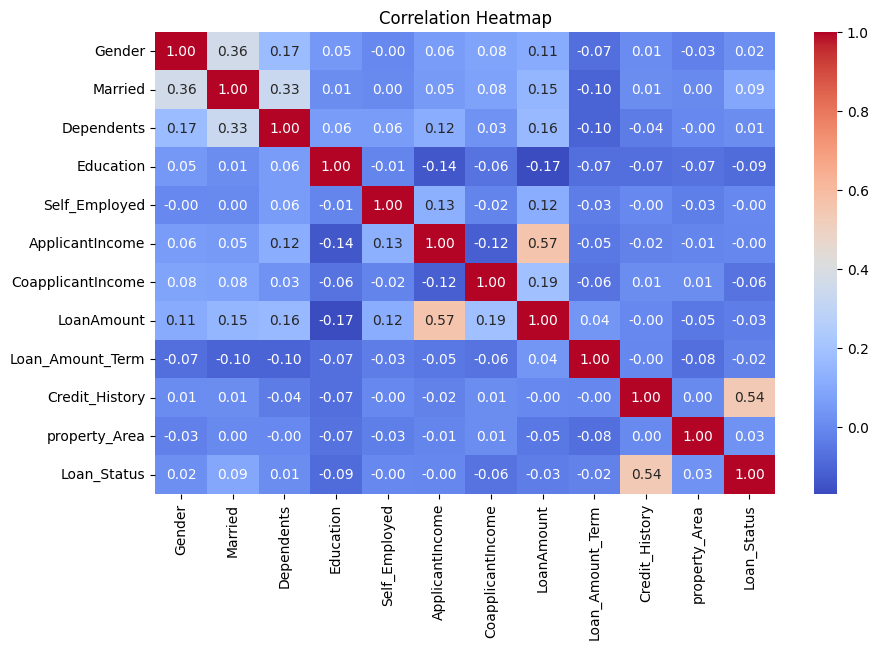

In [ ]:
# Select only numeric columns
numeric_data = train_data.select_dtypes(include=["float64", "int64"])

# Generate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
print(train_data.head())


    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.073497          -0.554104   -0.211241          0.273231   
1        -0.261168          -0.038356   -0.211241          0.273231   
2        -0.393199          -0.554104   -0.948996          0.273231   
3        -0.461507           0.252351   -0.306435          0.273231   
4         0.098232          -0.554104   -0.056551          0.273231   

   Credit_History  property_Area  Loan_Status  
0        0.411733              2            1  
1        0.411733              0            0  
2       

In [ ]:
print(test_data.head())


    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001015       1        1           0          0              0   
1  LP001022       1        1           1          0              0   
2  LP001031       1        1           2          0              0   
3  LP001035       1        1           2          0              0   
4  LP001051       1        0           0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.052365          -0.554104   -0.425428          0.273231   
1        -0.380749          -0.041092   -0.235040          0.273231   
2        -0.065578           0.061510    0.740701          0.273231   
3        -0.501313           0.316648   -0.544421          0.273231   
4        -0.347987          -0.554104   -0.806205          0.273231   

   Credit_History  property_Area  
0        0.411733              2  
1        0.411733              2  
2        0.411733              2  
3        0.4

In [ ]:
# Features and target
X = train_data.drop(columns=["Loan_ID", "Loan_Status"])  # Changed from "Loan_Status"
y = train_data["Loan_Status"]  # Changed to "Loan_Status" to match the encoded column name

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)


Training set size: (491, 11)
Validation set size: (123, 11)


In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_val, y_pred):.2f}")
    print(f"Precision: {precision_score(y_val, y_pred):.2f}")
    print(f"Recall: {recall_score(y_val, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_val, y_pred):.2f}")
    if y_pred_prob is not None:
        print(f"ROC AUC: {roc_auc_score(y_val, y_pred_prob):.2f}")


--- Logistic Regression ---
Accuracy: 0.79
Precision: 0.76
Recall: 0.99
F1 Score: 0.86
ROC AUC: 0.74
--- Random Forest ---
Accuracy: 0.77
Precision: 0.75
Recall: 0.96
F1 Score: 0.85
ROC AUC: 0.73
--- Support Vector Machine ---
Accuracy: 0.78
Precision: 0.76
Recall: 0.97
F1 Score: 0.85
ROC AUC: 0.74


In [ ]:
print(test_data.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_

# Evaluate on validation set
y_val_pred = best_model.predict(X_val)
y_val_prob = best_model.predict_proba(X_val)[:, 1]

print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")
print(f"Validation Precision: {precision_score(y_val, y_val_pred):.2f}")
print(f"Validation Recall: {recall_score(y_val, y_val_pred):.2f}")
print(f"Validation F1 Score: {f1_score(y_val, y_val_pred):.2f}")
print(f"Validation ROC AUC: {roc_auc_score(y_val, y_val_prob):.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.8124922696351267
Validation Accuracy: 0.78
Validation Precision: 0.76
Validation Recall: 0.97
Validation F1 Score: 0.85
Validation ROC AUC: 0.74


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'class_weight': ['balanced', None],
}

# Initialize the RandomForestClassifier with balanced class weights
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with expanded hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='accuracy', cv=100, verbose=2, n_jobs=-1)  # 10-fold CV

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_

# Evaluate on the validation set
y_val_pred = best_model.predict(X_val)
y_val_prob = best_model.predict_proba(X_val)[:, 1]

# Evaluation metrics
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")
print(f"Validation Precision: {precision_score(y_val, y_val_pred):.2f}")
print(f"Validation Recall: {recall_score(y_val, y_val_pred):.2f}")
print(f"Validation F1 Score: {f1_score(y_val, y_val_pred):.2f}")
print(f"Validation ROC AUC: {roc_auc_score(y_val, y_val_prob):.2f}")

In [ ]:
print(test_data.columns)


In [ ]:
X_reg = train_data.drop(columns=["Loan_ID", "LoanAmount", "Loan_Status"])
y_reg = train_data["LoanAmount"]

regressor = LinearRegression()
regressor.fit(X_reg, y_reg)


test_data_features = test_data[X_reg.columns]
test_data["Max_LoanAmount"] = regressor.predict(test_data_features)

In [ ]:
# Save predictions to CSV
test_data[["Loan_ID", "Loan_Status_Predicted", "Max_LoanAmount"]].to_csv("test_results.csv", index=False)
